In [5]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

# 1 load data 

In [119]:
mnist = tf.keras.datasets.mnist
(x_train_src,y_train_src),(x_test_src,y_test_src) = mnist.load_data('./mnist.npz')

In [120]:
print(x_train_src.shape,y_train_src.shape)
print(x_test_src.shape,y_test_src.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


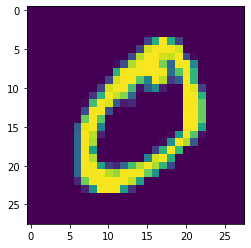

In [121]:
_,m,n = x_train_src.shape
plt.imshow(x_train_src[1,:,:])
plt.show()

# 2 feature //norm

In [7]:
x_train = x_train_src/255.
x_test = x_test_src/255.

y_train = y_train_src
y_test = y_test_src

# 3 model

In [39]:
num_h1 = 300
num_h2 = 150
num_h3 = num_h2
num_h4 = m*n

In [71]:
tf.reset_default_graph()

In [72]:
input_x = tf.placeholder(dtype=tf.float32,shape=[None,m,n],name='input_x')

In [73]:
x = tf.reshape(input_x,shape=[-1,m*n])

In [74]:
with tf.name_scope('h1'):
    w1 = tf.Variable(tf.truncated_normal(shape=[m*n,num_h1],mean=0.,\
                                     stddev=tf.sqrt(2.)*tf.sqrt(2./(m*n+num_h1))),dtype=tf.float32,\
                name = 'w1')
    b1 = tf.Variable(tf.zeros(shape=num_h1),name='b1',dtype=tf.float32)
    h1 = tf.matmul(x,w1) + b1

In [75]:
h1.shape

TensorShape([Dimension(None), Dimension(300)])

In [76]:
with tf.name_scope('h2'):
    w2 = tf.Variable(tf.truncated_normal(shape=[num_h1,num_h2],mean=0.,\
                                     stddev=tf.sqrt(2.)*tf.sqrt(2./(num_h2+num_h1))),dtype=tf.float32,\
                name = 'w2')
    b2 = tf.Variable(tf.zeros(shape=num_h2),name='b2',dtype=tf.float32)
    h2 = tf.matmul(h1,w2) + b2

In [77]:
with tf.name_scope('h3'):
    w3 = tf.Variable(tf.truncated_normal(shape=[num_h2,num_h3],mean=0.,\
                                     stddev=tf.sqrt(2.)*tf.sqrt(2./(num_h2+num_h3))),dtype=tf.float32,\
                name = 'w3')
    b3 = tf.Variable(tf.zeros(shape=num_h3),name='b3',dtype=tf.float32)
    h3 = tf.matmul(h2,w3) + b3

In [78]:
with tf.name_scope('h4'):
    w4 = tf.Variable(tf.truncated_normal(shape=[num_h3,num_h4],mean=0.,\
                                     stddev=tf.sqrt(2.)*tf.sqrt(2./(num_h3+num_h4))),dtype=tf.float32,\
                name = 'w4')
    b4 = tf.Variable(tf.zeros(shape=num_h4),name='b4',dtype=tf.float32)
    h4 = tf.matmul(h3,w4) + b4

# 4 loss

In [79]:
mse = tf.reduce_mean(tf.square(h4-x),name='mes')

In [80]:
reg_loss = tf.get_collection?

In [ ]:
reg_loss = tf.get_collection

In [81]:
reg_loss = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)

In [82]:
loss = tf.add_n([mse] + reg_loss,name='loss')

# 5 optimize

In [83]:
adam = tf.train.AdamOptimizer(learning_rate=3e-4)

In [84]:
train_op = adam.minimize(loss)

# 6 init

In [85]:
init_op = tf.global_variables_initializer()

# 7 train

In [86]:
saver = tf.train.Saver()

In [100]:
num_epochs = 10
batch_size = 128
num_batch = int(x_train.shape[0]/128) + 1

In [101]:
def feed_batch(n_epochs,batch_index,batch_size,x_train,y_train):
    beg = (batch_index -1 )* batch_size
    end = batch_index * batch_size;
    
    return x_train[beg:end],y_train[beg:end],np.array([i.shape[0] for i in x_train[beg:end]])

In [103]:
with tf.Session() as sess:
    sess.run(init_op)
    for i in range(num_epochs):
        for j in range(1,num_batch):
            sample_x,sample_y,sample_len = feed_batch(i,j,batch_size,x_train,y_train)
            train_loss,_= sess.run([loss,train_op],feed_dict={input_x:sample_x})
            if j%100 == 0:
                print('%d,%dth:loss is %f'%(i,j,train_loss))
    train_losss = sess.run([loss],feed_dict={input_x:x_train})
    print('final loss%f'%(train_loss))
    saver.save(sess,'./model/ae')

0,100th:loss is 0.072655
0,200th:loss is 0.041134
0,300th:loss is 0.032650
0,400th:loss is 0.025576
1,100th:loss is 0.021165
1,200th:loss is 0.016310
1,300th:loss is 0.016071
1,400th:loss is 0.014101
2,100th:loss is 0.013541
2,200th:loss is 0.011096
2,300th:loss is 0.011316
2,400th:loss is 0.010320
3,100th:loss is 0.010287
3,200th:loss is 0.008722
3,300th:loss is 0.009062
3,400th:loss is 0.008385
4,100th:loss is 0.008502
4,200th:loss is 0.007356
4,300th:loss is 0.007684
4,400th:loss is 0.007200
5,100th:loss is 0.007362
5,200th:loss is 0.006456
5,300th:loss is 0.006752
5,400th:loss is 0.006395
6,100th:loss is 0.006566
6,200th:loss is 0.005825
6,300th:loss is 0.006088
6,400th:loss is 0.005810
7,100th:loss is 0.005974
7,200th:loss is 0.005359
7,300th:loss is 0.005590
7,400th:loss is 0.005366
8,100th:loss is 0.005518
8,200th:loss is 0.004996
8,300th:loss is 0.005202
8,400th:loss is 0.005021
9,100th:loss is 0.005166
9,200th:loss is 0.004728
9,300th:loss is 0.004894
9,400th:loss is 0.004745


In [114]:
tf.reset_default_graph()

# 8 eval

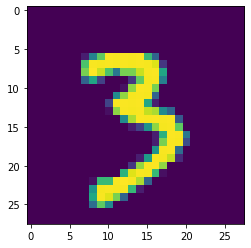

In [124]:
plt.imshow(x_test_src[30,:,:])
plt.show()

In [131]:
with tf.Session() as sess:
    ##import granph define
    new_saver = tf.train.import_meta_graph('./model/ae.meta')
    new_saver.restore(sess,'./model/ae')
    graph = tf.get_default_graph()
    for op in graph.get_operations():
        #print(op.name)
        pass
    ##output
    x = graph.get_tensor_by_name('input_x:0')
    h2 = graph.get_tensor_by_name('h2/add:0')
    h4 = graph.get_tensor_by_name('h4/add:0')
    output,embed = sess.run([h4,h2],feed_dict={x:x_test_src[30,:,:].reshape(-1,28,28)})

INFO:tensorflow:Restoring parameters from ./model/ae


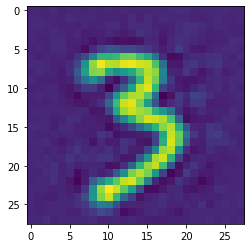

In [139]:
plt.imshow((output.reshape(28,28)*255.))
plt.show()

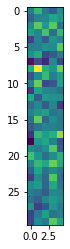

In [142]:
plt.imshow((embed.reshape(30,-1)*255.))
plt.show()